In [8]:
import requests
import pandas as pd 
from bs4 import BeautifulSoup
from tqdm import tqdm
import time
import os 
import numpy as np 
import ast
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()


In [9]:
df1=pd.read_csv('Cleaned beer data/Beerdata.csv')
df2=pd.read_csv('beer data/beer_data_step1.csv').set_index('beer_id')
df = df1.join(other=df2,on='beer_id',how='left')
df=df.rename(columns={'style_name':'Beer styles'})
df['Beer styles']=df['Beer styles'].str.replace('_',' / ')

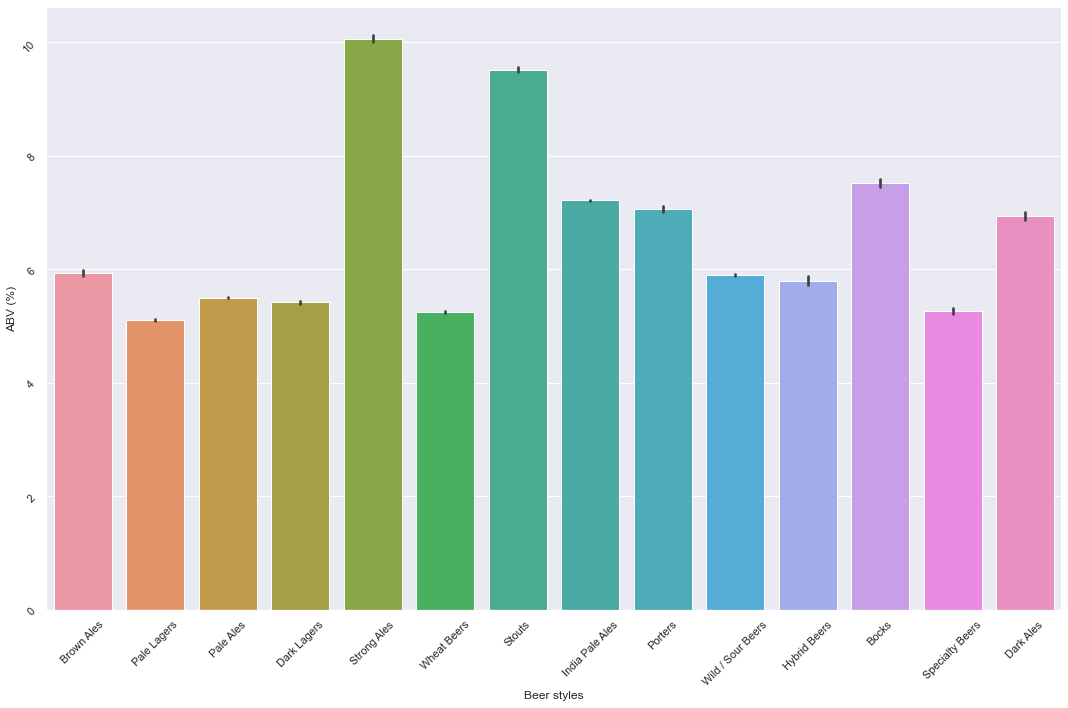

In [10]:
fig, ax = plt.subplots(figsize=(15,10))


sns.barplot(data=df, x="Beer styles", y="ABV (%)",ax=ax)

ax.tick_params(rotation=45) 
plt.tight_layout()

In [11]:
#display(df.head(2))
#print(df.columns)
df_sheet=df.set_index('beer_id')[[
                        'beer_name',
                        'brewery',
                        'location',
                        'address',
                        'loc_altitude',
                        'loc_latitude',
                        'loc_longitude',
                        'beer_style',
                        'Beer styles',
                        'ABV (%)',
                        'avg rating',
                        'N reviews',
                        'N ratings',
                        'BA score',
                        'N wants',
                        'N had',
                        'note',
                        'activity status',
                        'beer_page',
                        'beer_company_page_url']]

df_sheet['beer_page']='https://www.beeradvocate.com'+df_sheet['beer_page']
df_sheet['beer_company_page_url']='https://www.beeradvocate.com'+df_sheet['beer_company_page_url']

#df_sheet.to_csv('beer_data_sheet.csv')


In [12]:
df

,brewery,location,beer_style,ABV (%),BA score,avg rating,N reviews,N ratings,activity status,last rated date,...,beer_page,beer_company_name,beer_company_page_url,abv,rating,avg,last_active,beer_type_url,Beer styles,beer_type_name
0,Alaskan Brewing Co.,"Alaska, United States",Altbier,5.3,83.0,3.65,718,1536,Active,"Sep 07, 2022",...,/beer/profile/429/1309/,Alaskan Brewing Co.,/beer/profile/429/,5.30,2254,3.65,09-07-2022,https://www.beeradvocate.com/beer/styles/86/,Brown Ales,Altbier
1,Long Trail Brewing Co.,"Vermont, United States",Altbier,7.2,87.0,3.87,602,1179,Active,"Aug 30, 2022",...,/beer/profile/94/273/,Long Trail Brewing Co.,/beer/profile/94/,7.20,1781,3.87,08-30-2022,https://www.beeradvocate.com/beer/styles/86/,Brown Ales,Altbier
2,Long Trail Brewing Co.,"Vermont, United States",Altbier,5.0,81.0,3.57,446,983,Active,"Aug 30, 2022",...,/beer/profile/94/3128/,Long Trail Brewing Co.,/beer/profile/94/,5.00,1429,3.57,08-30-2022,https://www.beeradvocate.com/beer/styles/86/,Brown Ales,Altbier
3,Uerige Obergärige Hausbrauerei,Germany,Altbier,8.5,91.0,4.10,455,266,Active,"Aug 22, 2022",...,/beer/profile/1923/24042/,Uerige Obergärige Hausbrauerei,/beer/profile/1923/,8.50,721,4.10,08-22-2022,https://www.beeradvocate.com/beer/styles/86/,Brown Ales,Altbier
4,Ninkasi Brewing Company,"Oregon, United States",Altbier,7.2,85.0,3.76,182,443,Active,"Apr 11, 2021",...,/beer/profile/14400/47120/,Ninkasi Brewing Company,/beer/profile/14400/,7.20,625,3.76,04-11-2021,https://www.beeradvocate.com/beer/styles/86/,Brown Ales,Altbier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194113,Apex Aleworks,"Missouri, United States",Witbier,8.5,NaN,0.00,0,0,Active,Not rated,...,/beer/profile/54266/489724/,Apex Aleworks,/beer/profile/54266/,8.50,0,0.00,06-15-2020,https://www.beeradvocate.com/beer/styles/48/,Wheat Beers,Witbier
194114,Rochester Brewing & Roasting Co.,"Missouri, United States",Witbier,4.9,NaN,0.00,0,0,Active,Not rated,...,/beer/profile/57106/491260/,Rochester Brewing & Roasting Co.,/beer/profile/57106/,4.90,0,0.00,06-24-2020,https://www.beeradvocate.com/beer/styles/48/,Wheat Beers,Witbier
194115,Wolf Branch Brewing,"Florida, United States",Witbier,4.8,NaN,0.00,0,0,Active,Not rated,...,/beer/profile/60099/519676/,Wolf Branch Brewing,/beer/profile/60099/,4.80,0,0.00,11-23-2020,https://www.beeradvocate.com/beer/styles/48/,Wheat Beers,Witbier
194116,Strap Tank Brewing Co.,"Utah, United States",Witbier,4.8,NaN,0.00,0,0,Active,Not rated,...,/beer/profile/48685/464893/,Strap Tank Brewing Co.,/beer/profile/48685/,4.80,0,0.00,02-07-2020,https://www.beeradvocate.com/beer/styles/48/,Wheat Beers,Witbier
